In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def generate_random_data(size, a=0.1, mu=100, sigma=0.1):
    y = np.empty(size)
    epsilon = np.random.normal(0, sigma, size)

    y[0] = mu + epsilon[0]

    for i in range(1, size):
        y[i] = (1 - a) * mu + a * y[i-1] + epsilon[i]

    return y

In [182]:
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y[:-1] + 100

array([101, 102, 103, 104, 105, 106, 107, 108, 109])

In [183]:
(y >= 5) * y

array([ 0,  0,  0,  0,  5,  6,  7,  8,  9, 10])

In [156]:
y.shape + (10, )

(10, 10)

In [262]:
def predict(y_prev, a=0.1, mu=100, sigma=0.1, predictions_n=1000):
    epsilon = np.random.normal(0, sigma, y_prev.shape + (predictions_n, ))
    
    return (1 - a) * mu + a * y_prev.reshape(-1, 1) + epsilon

In [263]:
z = predict(y, predictions_n=3)
z

array([[ 99.9927683 , 100.10680112, 100.27643408],
       [ 99.94366562, 100.18562178, 100.06917133],
       [100.3570044 , 100.26659739, 100.26579278],
       ...,
       [100.05490005, 100.16069878, 100.14615646],
       [100.01060799, 100.1682735 , 100.20435921],
       [100.04356813,  99.94472475,  99.8372167 ]])

In [172]:
z.mean(axis=1)

array([90.08329659, 90.25025579, 90.27451239, 90.42971648, 90.44865308,
       90.68670749, 90.64005028, 90.82861378, 90.85157312, 90.93999337])

In [35]:
def get_predictive_distribution(y_prev, size=1000, a=0.1, mu=100, sigma=0.1):
    predictions = [predict(y_prev, a=a, mu=mu, sigma=sigma) for _ in range(size)]

    return np.array(predictions)
    

In [68]:
predictive_distr = get_predictive_distribution(104, size=10000, a=0.9, mu=100, sigma=1)
predictive_distr.mean()

103.60787679742653

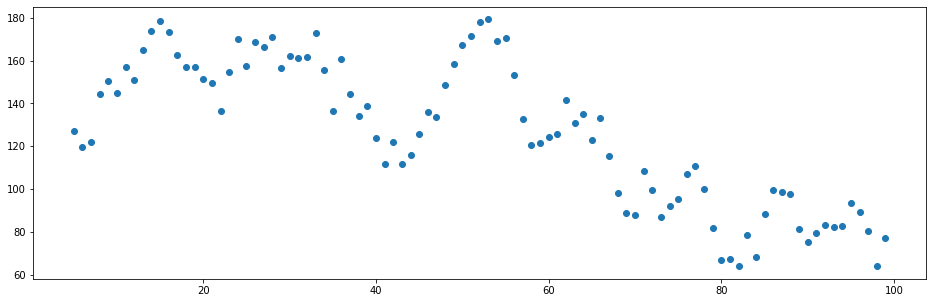

In [117]:
size = 100
y = generate_random_data(size, a=0.99999, mu=100, sigma=10)
x = np.arange(size)

idx = 5
plt.figure(figsize=(16, 5))
plt.scatter(x[idx:], y[idx:])
plt.show()


In [130]:
def optimal(y):
    return np.max(y)

In [319]:
from scipy.optimize import fsolve, brentq, bisect

def tb_algorithm(y):
    m, M = y.min(), y.max()

    f_c = lambda c: np.log((M - m) / (m * (c - 1))) - c
    c = bisect(f_c, 1 + 1e-8, 1000, maxiter=10000)

    y_highest = y[0]

    utility = 0
    d = 1

    for y_i in y[1:]:
        if y_i > y_highest:
            x_i = (1 / c) * (y_i - y_highest) / (y_i - m)
            y_highest = y_i

            utility += x_i * y_i            
            d -= x_i

            if d == 0.0:
                break

    utility += d * y[-1]

    return utility
    

In [318]:
tb_algorithm(generate_random_data(500, a=0.9, mu=100, sigma=1))

103.15414331875101

In [333]:
def algorithm(y, size=1000, alpha=1, a=0.9, mu=100, sigma=0.1):
    d = 1
    utility = 0

    y_prev = y[:-1]
    y_true = y[1:]

    y_pred = predict(y_prev, predictions_n=size, a=a, mu=mu, sigma=sigma)
    y_pred_mean = y_pred.mean(axis=1)

    x = (y_true > y_pred_mean) * np.tanh((y_true - y_pred_mean) / y_pred_mean)

    i = 0
    while d > 0 and i < len(y_true):
        amount = min(x[i], d)
        utility += amount * y_true[i]
        d -= amount
        i += 1

    utility += d * y_true[-1]

    return utility

In [345]:
a = 0.9999999
mu = 100
sigma = 1
alpha = 0.5
size = 5000

random_data = [generate_random_data(500, a=a, mu=mu, sigma=sigma) for _ in range(500)]

optimal_utility = np.array([
    optimal(random_data[i]) 
    for i in range(500)
])

algorithm_utility = np.array([
    algorithm(random_data[i],
              size=500, alpha=alpha, a=a, mu=mu, sigma=sigma)
    for i in range(500)
])

tb_algorithm_utility = np.array([
    tb_algorithm(random_data[i])
    for i in range(500)
])


optimal_utility.mean(), algorithm_utility.mean(), tb_algorithm_utility.mean()
# algorithm_utility.mean()

(117.31950235853033, 100.6980251457003, 94.17591561916659)